# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Logistic Distribution

Use `random.logistic()` to get a logistic distribution. Specify these three parameters:

- `loc` = mean
- `scale` = the scaling factor, which is derived from a standard deviation in special cases
- `size` = the shape of the returned array

More information can be found on [Wikipedia](https://en.wikipedia.org/wiki/Logistic_distribution). That article is more technical and goes into more examples of how the logistic distribution differs from the normal distribution, and how models based on these models differ. A general take away is that models based on the logistic distribution may be more tractable and solvable analytically, as compared to models based on the normal distribution. Another take away is that the logistic distribution has heavier tails / more kurtosis as compared to the normal distribution.

In [2]:
import numpy as np
from configurations import printer

locs_to_cycle_through = [-10, 0, 10]
scales_to_cycle_through = [1, 10, 100]
for loc in locs_to_cycle_through:
    for scale in scales_to_cycle_through:
        my_array = np.random.logistic(loc=loc, scale=scale, size=10)
        printer(
            'These are 10 examples of the results from a logistic\n'
            'distribution with loc = %s and scale = %s\n%s\n',
            loc,
            scale,
            my_array
        )

These are 10 examples of the results from a logistic
distribution with loc = -10 and scale = 1
[ -8.14171404 -10.12458551 -11.99022256 -11.79984825 -12.63290916
  -7.38701517  -8.88145697  -9.18798251  -8.91163738 -11.3843282 ]

These are 10 examples of the results from a logistic
distribution with loc = -10 and scale = 10
[-15.25126114   8.14920588 -13.28462523   7.09509225 -33.55424583
 -15.82104817  -8.02744631  -9.03564734   4.15415818  20.08166859]

These are 10 examples of the results from a logistic
distribution with loc = -10 and scale = 100
[ 283.31429856  194.17393722  -36.60619068   32.56501709  129.3235153
   31.12761432 -256.42317782 -197.55526831  -19.68781482  -34.65450369]

These are 10 examples of the results from a logistic
distribution with loc = 0 and scale = 1
[ 0.1821115   0.28565161  1.02971772 -2.68282751 -3.59500043 -0.52438196
  1.28643393 -3.34832717 -3.72437298  1.05831154]

These are 10 examples of the results from a logistic
distribution with loc = 0 and s

### Visualization of Logistic distribution


2023-08-21 18:28:08 
	Logger: numpy-tutorial Module: 3832528400 Function: <module> File: 3832528400.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-21 18:28:08 
	Logger: numpy-tutorial Module: 3832528400 Function: <module> File: 3832528400.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



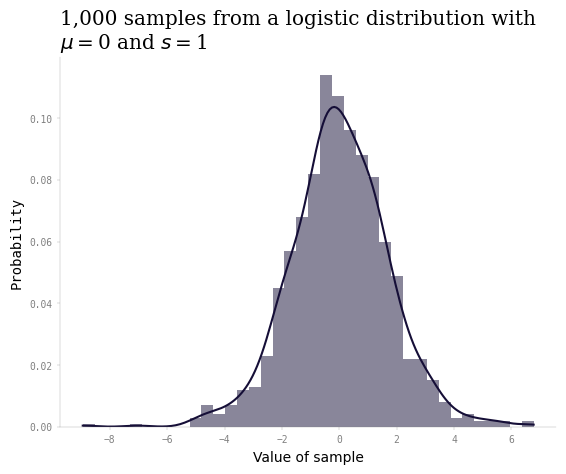

In [3]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_logistic(
        loc: float = 0,
        scale: float = 1,
        size: int = 1_000,
        bw_adjust: float = 1
    ) -> None:
    my_logistic = np.random.logistic(loc=loc, scale=scale, size=size)

    sns.histplot( # type: ignore
        my_logistic,
        ax=plt.subplots()[1], # type: ignore
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None'
        )
    
    plt.title( # type: ignore
        label=f'{size:,} samples from a logistic distribution with\n'
        fr'$\mu=${loc:,.0f} and $s=${scale:,.0f}',
        family='serif'
    )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore

plot_logistic()

Note the longer tails (more kurtosis) of the logistic distribution as compared to the normal distribution.

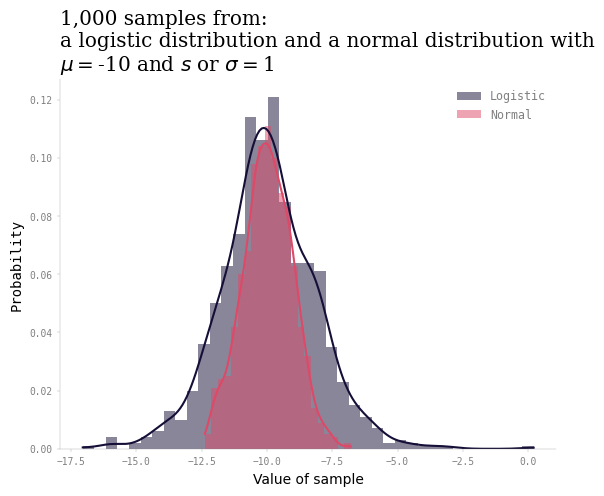

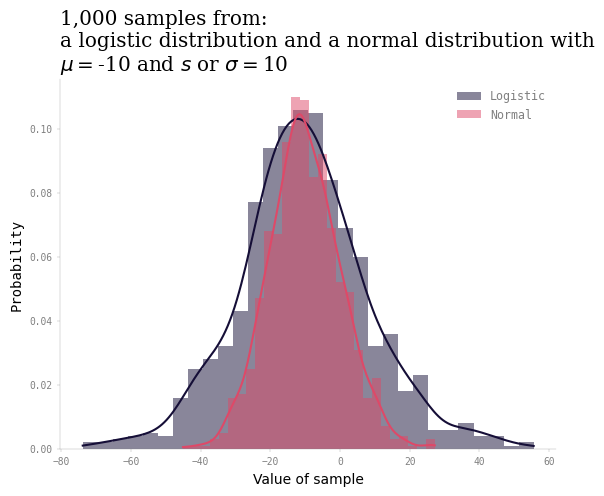

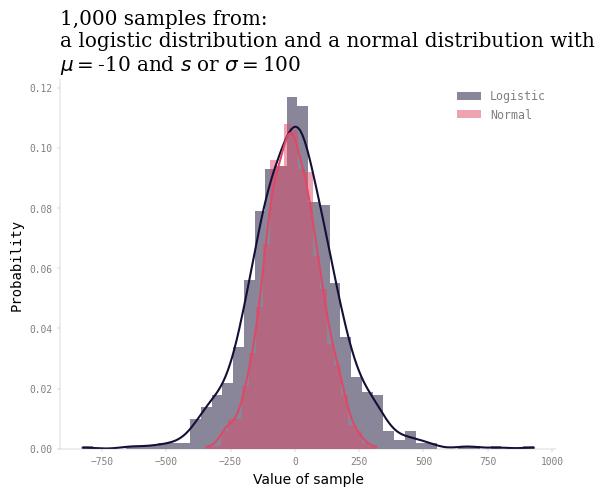

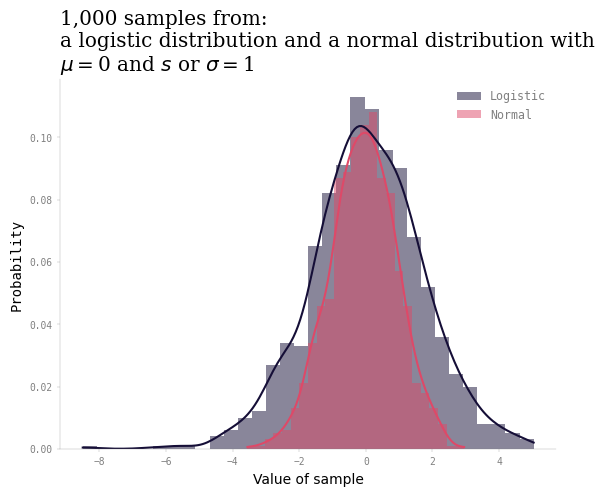

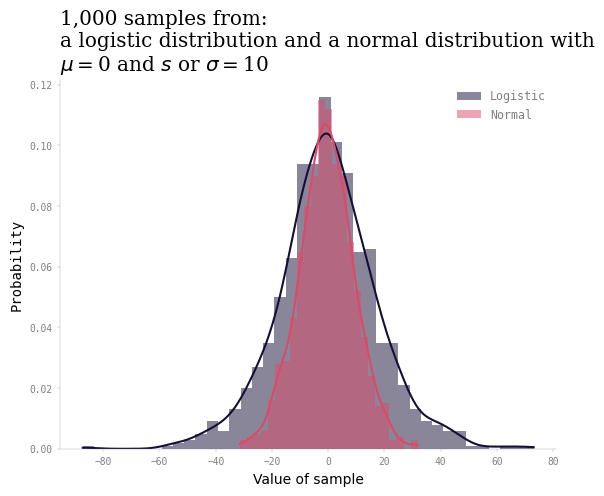

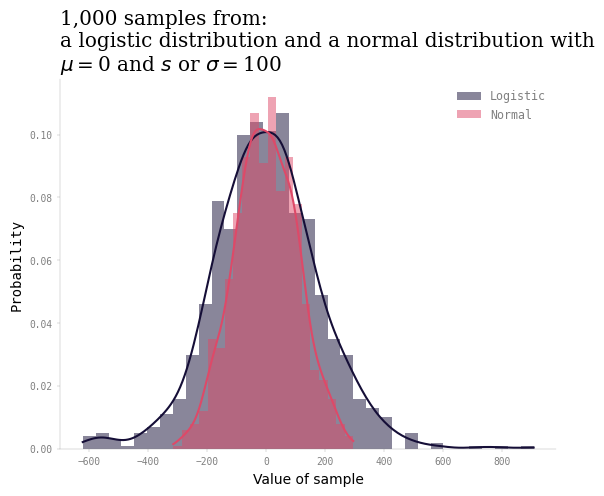

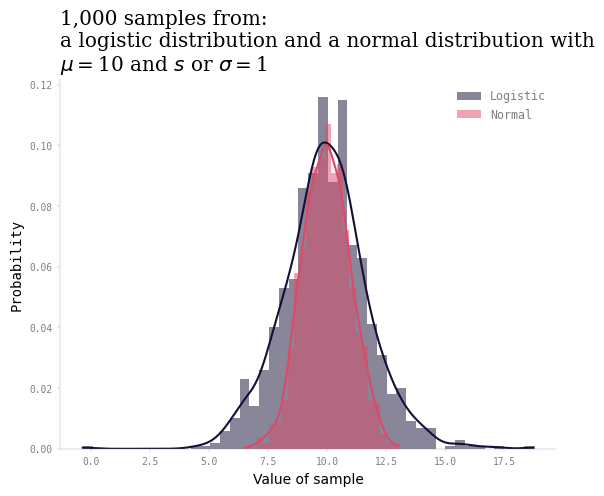

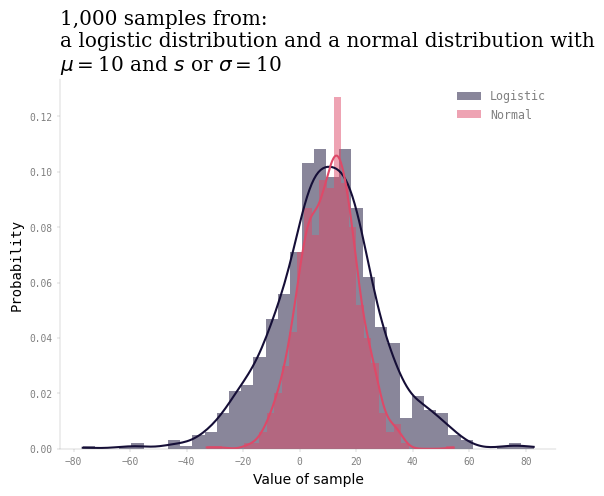

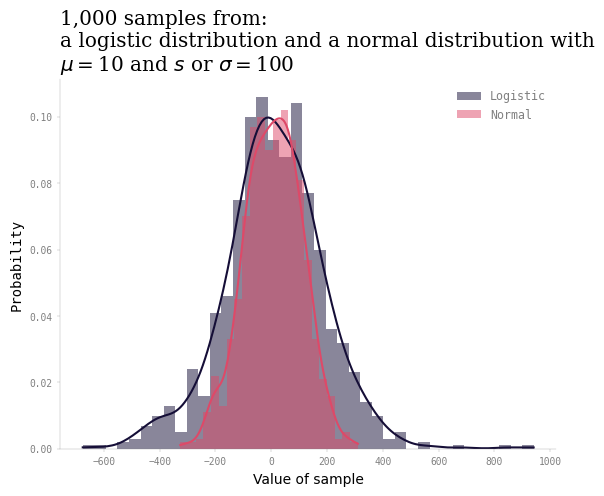

In [2]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('my_mpl_stylesheet.mpltstyle')

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )

def plot_logistic_and_normal(
        loc: float = 0,
        scale: float = 1,
        size: int = 1_000,
        bw_adjust: float = 1
    ) -> None:

    my_logistic = np.random.logistic(loc=loc, scale=scale, size=size)
    
    ax = plt.subplots()[1] # type: ignore

    sns.histplot( # type: ignore
        my_logistic,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(0),
        label='Logistic'
    )

    my_normal = np.random.normal(loc=loc, scale=scale, size=size)

    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(5),
        label='Normal'
    )

    ax.legend() # type: ignore
    
    plt.title( # type: ignore
        label=f'{size:,} samples from:\n'
        'a logistic distribution and a normal distribution with\n'
        fr'$\mu=${loc:,} and $s$ or $\sigma=${scale:,.0f}',
        family='serif'
    )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
locs_to_cycle_through = [-10, 0, 10]
scales_to_cycle_through = [1, 10, 100]
for loc in locs_to_cycle_through:
    for scale in scales_to_cycle_through:
        plot_logistic_and_normal(loc=loc, scale=scale)

Below we see that if $\sigma$ is scaled to be about 1.6 or 1.7 times the $s$ used in a logistic regression, it the two become nearly identical.

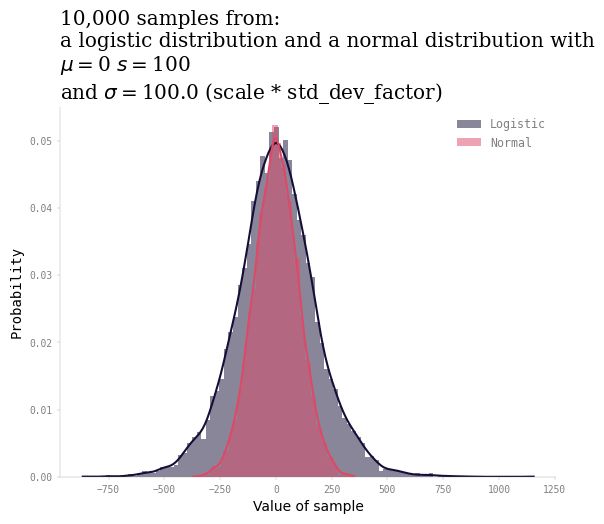

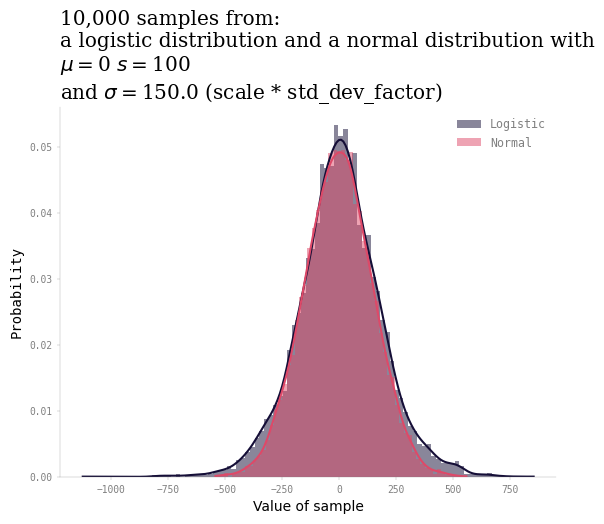

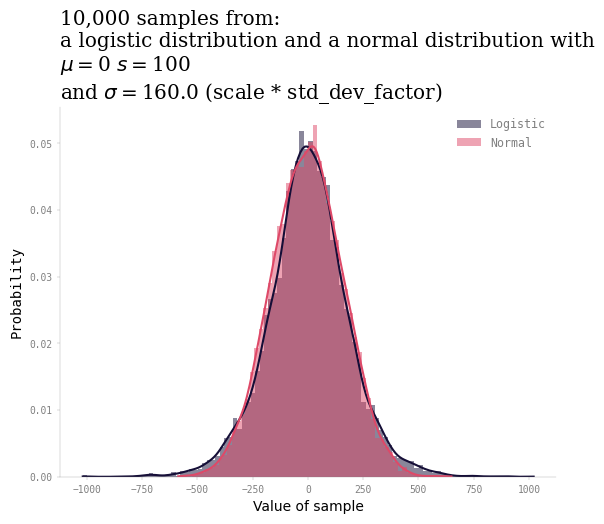

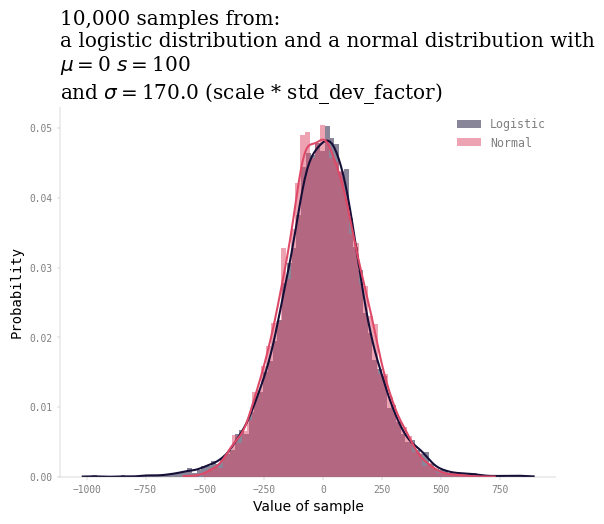

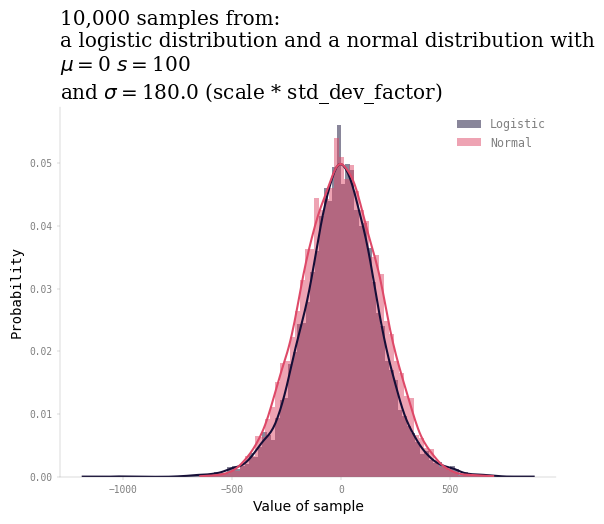

In [8]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('my_mpl_stylesheet.mpltstyle')

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )

def plot_logistic_and_normal(
        loc: float = 0,
        scale: float = 1,
        size: int = 10_000,
        bw_adjust: float = 1,
        std_dev_factor: float = 1
    ) -> None:

    my_logistic = np.random.logistic(loc=loc, scale=scale, size=size)
    
    ax = plt.subplots()[1] # type: ignore

    sns.histplot( # type: ignore
        my_logistic,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(0),
        label='Logistic'
    )

    my_normal = np.random.normal(
        loc=loc,
        scale=scale * std_dev_factor,
        size=size
        )

    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(5),
        label='Normal'
    )

    ax.legend() # type: ignore
    
    plt.title( # type: ignore
        label=f'{size:,} samples from:\n'
        'a logistic distribution and a normal distribution with\n'
        fr'$\mu=${loc:,} $s=${scale:,.0f}'
        '\n'
        fr'and $\sigma=${scale * std_dev_factor:,.1f} (scale * std_dev_factor)',
        family='serif'
    )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
factors_to_cycle_through = [1, 1.5, 1.6, 1.7, 1.8]
for factor in factors_to_cycle_through:
    plot_logistic_and_normal(loc=0, scale=scale, std_dev_factor=factor)